In [1]:
import pandas as pd

order_report = pd.read_csv('Order Report.csv')
sku_master = pd.read_csv('SKU Master.csv')
pincode_mapping = pd.read_csv('pincodes.csv')
courier_invoice = pd.read_csv('Invoice.csv')
courier_company_rates = pd.read_csv('Courier Company - Rates.csv')

print("Order Report:")
print(order_report.head())
print("\nSKU Master:")
print(sku_master.head())
print("\nPincode Mapping:")
print(pincode_mapping.head())
print("\nCourier Invoice:")
print(courier_invoice.head())
print("\nCourier Company rates:")
print(courier_company_rates.head())

Order Report:
   ExternOrderNo            SKU  Order Qty  Unnamed: 3  Unnamed: 4
0     2001827036  8904223818706        1.0         NaN         NaN
1     2001827036  8904223819093        1.0         NaN         NaN
2     2001827036  8904223819109        1.0         NaN         NaN
3     2001827036  8904223818430        1.0         NaN         NaN
4     2001827036  8904223819277        1.0         NaN         NaN

SKU Master:
             SKU  Weight (g)  Unnamed: 2  Unnamed: 3  Unnamed: 4
0  8904223815682         210         NaN         NaN         NaN
1  8904223815859         165         NaN         NaN         NaN
2  8904223815866         113         NaN         NaN         NaN
3  8904223815873          65         NaN         NaN         NaN
4  8904223816214         120         NaN         NaN         NaN

Pincode Mapping:
   Warehouse Pincode  Customer Pincode Zone  Unnamed: 3  Unnamed: 4
0             121003            507101    d         NaN         NaN
1             121003       

In [2]:
print("\nMissing values in Website Order Report:")
print(order_report.isnull().sum())
print("\nMissing values in SKU Master:")
print(sku_master.isnull().sum())
print("\nMissing values in Pincode Mapping:")
print(pincode_mapping.isnull().sum())
print("\nMissing values in Courier Invoice:")
print(courier_invoice.isnull().sum())
print("\nMissing values in courier company rates:")
print(courier_company_rates.isnull().sum())


Missing values in Website Order Report:
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

Missing values in SKU Master:
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

Missing values in Pincode Mapping:
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

Missing values in Courier Invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

Missing values in courier company rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed        

In [3]:
# Remove unnamed columns from the Website Order Report DataFrame
order_report = order_report.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the SKU Master DataFrame
sku_master = sku_master.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the Pincode Mapping DataFrame
pincode_mapping = pincode_mapping.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

In [4]:
merged_data = pd.merge(order_report, sku_master, on='SKU')
print(merged_data.head())

   ExternOrderNo            SKU  Order Qty  Weight (g)
0     2001827036  8904223818706        1.0         127
1     2001821995  8904223818706        1.0         127
2     2001819252  8904223818706        1.0         127
3     2001816996  8904223818706        1.0         127
4     2001814580  8904223818706        1.0         127


In [5]:
merged_data = merged_data.rename(columns={'ExternOrderNo': 'Order ID'})

In [6]:
print(merged_data.head())

     Order ID            SKU  Order Qty  Weight (g)
0  2001827036  8904223818706        1.0         127
1  2001821995  8904223818706        1.0         127
2  2001819252  8904223818706        1.0         127
3  2001816996  8904223818706        1.0         127
4  2001814580  8904223818706        1.0         127


In [7]:
abc_courier = pincode_mapping.drop_duplicates(subset=['Customer Pincode'])
courier_abc= courier_invoice[['Order ID', 'Customer Pincode','Type of Shipment']]
pincodes= courier_abc.merge(abc_courier,on='Customer Pincode')
print(pincodes.head())

     Order ID  Customer Pincode Type of Shipment  Warehouse Pincode Zone
0  2001806232            507101  Forward charges             121003    d
1  2001806273            486886  Forward charges             121003    d
2  2001806408            532484  Forward charges             121003    d
3  2001806458            143001  Forward charges             121003    b
4  2001807012            515591  Forward charges             121003    d


In [8]:
merged2 = merged_data.merge(pincodes, on='Order ID')

In [10]:
merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e


In [11]:
merged2['Weights (Kgs)'] = merged2['Weight (g)'] / 1000
merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone,Weights (Kgs)
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350


In [12]:
def weight_slab(weight):
    i = round(weight % 1, 1)
    if i == 0.0:
        return weight
    elif i > 0.5:
        return int(weight) + 1.0
    else:
        return int(weight) + 0.5

merged2['Weight Slab (KG)'] = merged2['Weights (Kgs)'].apply(weight_slab)
courier_invoice['Weight Slab Charged by Courier Company']=(courier_invoice['Charged Weight']).apply(weight_slab)

In [13]:
merged2.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Zone,Weights (Kgs),Weight Slab (KG)
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127,0.5
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150,0.5
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100,0.5
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165,0.5
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350,0.5


In [14]:
courier_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Weight Slab Charged by Courier Company
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.5
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,1.0
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.5
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,1.0
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.5


In [15]:
courier_invoice = courier_invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Company'})
merged2 = merged2.rename(columns={'Zone': 'Delivery Zone As Per ABC'})
merged2 = merged2.rename(columns={'Weight Slab (KG)': 'Weight Slab As Per ABC'})

In [16]:
total_expected_charge = []

for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per ABC']
    fwd_fixed = courier_company_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per ABC']
    rto_fixed = courier_company_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))
    else:
        total_expected_charge.append(0)

merged2['Expected Charge as per ABC'] = total_expected_charge
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per ABC  Weights (Kgs)  \
0  Forward charges             121003                        e          0.127   
1  Forward charges             121003                        e          0.150   
2  Forward charges             121003                        e          0.100   
3  Forward charges             121003                        e          0.165   
4  Forward charges             121003                        e          0.350   

   Weight Slab As Per ABC  Expected Charge as per ABC  
0                 

In [18]:
merged_output = merged2.merge(courier_invoice, on='Order ID')
merged_output.head()

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode_x,Type of Shipment_x,Warehouse Pincode_x,Delivery Zone As Per ABC,Weights (Kgs),Weight Slab As Per ABC,Expected Charge as per ABC,AWB Code,Charged Weight,Warehouse Pincode_y,Customer Pincode_y,Delivery Zone Charged by Courier Company,Type of Shipment_y,Billing Amount (Rs.),Weight Slab Charged by Courier Company
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350,0.5,56.6,1091122418320,1.6,121003,173213,b,Forward charges,117.9,2.0


In [20]:
df_diff = merged_output
df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)'] - df_diff['Expected Charge as per ABC']

df_new = df_diff[['Order ID','Billing Amount (Rs.)', 'Difference (Rs.)', 'Expected Charge as per ABC']]

df_new.head()

,Order ID,Billing Amount (Rs.),Difference (Rs.),Expected Charge as per ABC
0,2001827036,117.9,61.3,56.6
1,2001827036,117.9,61.3,56.6
2,2001827036,117.9,61.3,56.6
3,2001827036,117.9,61.3,56.6
4,2001827036,117.9,61.3,56.6


In [21]:
# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (Rs.)'] < 0])

# Calculate the total amount in each category
amount_overcharged = abs(df_new[df_new['Difference (Rs.)'] > 0]['Difference (Rs.)'].sum())
amount_undercharged = df_new[df_new['Difference (Rs.)'] < 0]['Difference (Rs.)'].sum()
amount_correctly_charged = df_new[df_new['Difference (Rs.)'] == 0]['Expected Charge as per ABC'].sum()

# Create a new DataFrame for the summary
summary_data = {'Description': ['Total Orders where ABC has been correctly charged',
                                'Total Orders where ABC has been overcharged',
                                'Total Orders where ABC has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_undercharged],
                'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)

df_summary

,Description,Count,Amount (Rs.)
0,Total Orders where ABC has been correctly charged,12,507.6
1,Total Orders where ABC has been overcharged,382,33750.5
2,Total Orders where ABC has been undercharged,7,-165.2


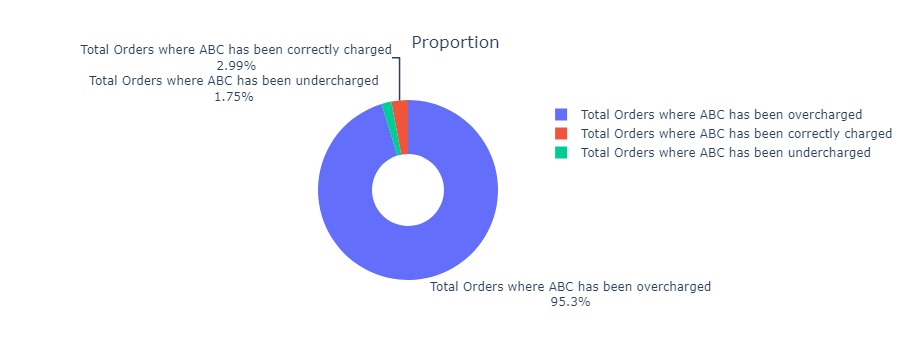

In [29]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Pie(labels=df_summary['Description'],
                            values=df_summary['Count'],
                            textinfo='label+percent',
                            hole=0.4))
fig.update_layout(title='Proportion',title_x=0.5, title_y=0.9 )

fig.show()